&copy; Bedzyk Research Group 2020, Northwestern University

<div class="alert alert-block alert-warning">
To start this project, in the top menu bar click $\text{Cell}\to \text{ Run All}$. Then, scroll back up to the top of this document.
</div>

In [1]:
#http://blog.nextgenetics.net/?e=102
from IPython.display import HTML
HTML('''<script>
code_show_2=true; 
function code_toggle_2() {
 if (code_show_2){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show_2 = !code_show_2
} 
$( document ).ready(code_toggle_2);
</script>
The raw code for this Jupyter Notebook is by default hidden for easier reading.
To toggle on/off the raw code for this entire notebook, click <a href="javascript:code_toggle_2()">here</a>.''')


<div class="alert alert-block alert-warning">
Raw code is hidden by default for the entire notebook. You can toggle on/off the raw code for this entire notebook by clicking the button above. More importantly, raw code for individual cells can be shown/hidden by using the message/button: <img src="https://github.com/josephmccourt2018/lab_jupyter_notebooks/blob/master/images/show_hide_button.png?raw=true" /> Hiding the code is mainly for visual purposes and may be useful if you would like a hard copy (i.e. pdf) of this document. However, there are also instances where you will need to show the code cell so you can input different parameters. This button will show up repeatedly throughout this document. Try showing and hiding the code in the cell block below as an example.
</div>

In [2]:
# importing the necessary libraries and packages for XRR.ipynb
import ipywidgets as widgets
from ipywidgets import Label, Layout
from IPython.display import display, Markdown, clear_output
from IPython.display import display
from IPython.display import Image
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy import integrate
from IPython.display import IFrame



# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
# https://gist.github.com/Zsailer/5d1f4e357c78409dd9a5a4e5c61be552

# This tag allows the supression of input cells that have to deal with formatting and code.
# You are viewing the "code" version of the "click here" button you just pressed
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
(To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.)''')
display(tag)

# Jupyter Notebook Introduction

Jupyter Notebook is a an open source web application/user interface that allows users to create and share documents containing code, equations, visualizations, and narrative text by using a combination of different programming languages. In this Jupyter Notebook (*XRR.ipynb*), we will be using **Python 3** for all analysis purposes (in the top right corner of this page, you will see the tag Python 3 which tells you the programming language of the notebook). The most important concept of Jupyter Notebooks is the concept of a **cell block**. Clicking on a block of text or code will highlight (in blue in this case) the current cell block you are viewing. Click on this block of text. In the menu bar at the top of this document, you will see a drop down menu: <img src="https://github.com/josephmccourt2018/lab_jupyter_notebooks/blob/master/images/markdown_dropdown.png?raw=true" />

**Markdown** is referring the type of this cell block. Markdown is a text formatting language supported in Jupyter Notebook. By *double clicking* on the text you are reading right now, you will see the Markdown version of the cell block. You will see the other types of supported cell blocks by clicking the drop down menu. For example, "Code" is another type of cell block you will be seeing in this document and they all contain snippets of Python 3 code. 

To run code of a particular cell block, click into the cell and either click the run button above: 

<img src="https://github.com/josephmccourt2018/lab_jupyter_notebooks/blob/master/images/run_jupyter.png?raw=true" />


or click "Shift+Enter" on your keyboard. Running a cell will also allow you to exit the "code view" version of a Markdown cell block. 

That is all you will need to know for this laboratory exercise. Have fun and we welcome any positive/negative feedback!

>**NOTE:** *Do not worry if you do not know Python or Markdown as there is no coding necessary for completing this project. In fact, most code cells can be left hidden for the entire exercise and you never even have to see code!*

# Re-accessing X-ray Lab Server

<div class="alert alert-block alert-danger">
Before beginning, make sure to locate your netID folder. This is where you will be saving all of your data. You should have already created a folder during the X-ray Reflectivity Exercise (Lab 1).

<br/>
    
In general, to save a scan: $\text{ Right click on scan } \to \text{ Save data }\to \text{ to File}$ 
<br/><br/>
On the lab computer, the location of the server is:
<br/><br/>
$\text{This PC} \to \text{mrc_xrayfac (\\\\resfiles.northwestern.edu)(Z:)} \to \text{netID folders} \to \text{[your_net_ID]}$

    
You may also wish to mount the server onto your computer. Click the following link and follow the appropriate steps if you would like to do so:
>https://kb.northwestern.edu/page.php?id=70525

For further clarification, see *XRR.ipynb* in this same directory.

 
</div>

# *Before You Begin...*
Please verify what SmartLab model you are using. In the cell block below, please click on the machine and software that corresponds to your SmartLab. You will see a screen shot of the software for the machine you click on.

After selecting, navigate into the cell block below the screen shot. Click $\text{Cell}\to \text{ Run All Below}$ to update the instructions tailored to your machine.

Most of the lab will be performed within the *Pro/Manual Control* window of the Smartlab softwares (circled in red in the screenshots).

In [3]:
display(tag)

machine_toggle_1 = widgets.ToggleButton(
    value=False,
)

machine_button_1 = widgets.Button(
    description='Smartlab Gen 1, Guidance',
    disabled=False,
    button_style='Warning', # 'success', 'info', 'warning', 'danger' or ''
    layout={'width': '300px'}
)

machine_toggle_2 = widgets.ToggleButton(
    value=False,
)

machine_button_2 = widgets.Button(
    description='Smartlab Gen 2, Studio II',
    disabled=False,
    button_style='Warning', # 'success', 'info', 'warning', 'danger' or ''
    layout={'width': '300px'}
)

#defining what the button will do on clicking: output a screenshot of each software
def on_button_clicked_machine_1(b):
    clear_output()
    display(machines)
    machine_toggle_1.value = True
    machine_toggle_2.value = False
    display(Image(filename='images/guidance_3.png'))   
def on_button_clicked_machine_2(b):
    clear_output()
    display(machines)
    machine_toggle_1.value = False
    machine_toggle_2.value = True
    display(Image(filename='images/studio_II_3.png'))
    

machine_button_1.on_click(on_button_clicked_machine_1)
machine_button_2.on_click(on_button_clicked_machine_2)
        
#displaying the buttons for the two types of machines
machine_button_layout = widgets.Layout(align_items='center')
machines = widgets.VBox(children=[machine_button_1,machine_button_2],layout=machine_button_layout)
display(machines)

# Click $\text{Cell}\to \text{Run  All  Below}$ when inside of this cell after selecting your instrument.

<br/><br/>
<div align="center">
<font size="18" color="#990000"><b> Thin Film <br/> <br/> Off-Specular X-ray Diffraction </b></font>
</div>

# Overview of the technique

Lab 2 (HRXRD Specular) established the out-of-plane lattice orientation of the film with respect to the substrate. You should have found  Pt (111) or $\alpha$ Fe2O3 (001) planes were parallel to $\alpha$ $\text{Al}_2\text{O}_3$ (001) planes. You also determined out-of-plane domain size and strain (i.e. d-spacing). In lab 3, we will find if the in-plane lattice vectors of the film and substrate are aligned (versus out-of-plane as done in lab 2). This exercise is to prove that the film is indeed an epitaxial film. The film could in fact be *textured* with a definite orientation in the out of plane direction, but with in-plane orientations of the domains randomly rotated. You should find that the film is not textured but has in plane epitaxial relation to the underlying substrate lattice. To do this, we need to move the diffractometer axis such that we can line up off-specular (i.e. off-normal) Bragg peaks.

<div align="center">
<FIGURE> 
    <img src="https://github.com/josephmccourt2018/lab_jupyter_notebooks/blob/master/images/Fig1_HXRD_SmartLab_v2.png?raw=true" />

   <FIGCAPTION> <b>Fig. 1:</b> <i> SmartLab Diffractometer with Ge (220) 2-bounce monochromator option inserted to increase the resolution. 
       
</FIGURE>
</div>

Prior to the lab, you need to plan this exercise by using CrystalMaker and subsidiary program SingleCrystal to judicioulsy locate *families* of off-specular Bragg peaks. $\phi$ scans about the $c$ axis of the $\alpha$ $\text{Al}_2\text{O}_3$ (001)substrate at the fixed $\chi$ and $2\theta / \omega$ for a given off-specular {hkl} set of Bragg reflections for both the film and substrate will give you the in-plane orientation of the film to substrate. You should have used Single Crystal to determine what off-specular film and substrate (hkl) reflections you will target for this exercise. We want to loom at off-specular reflections with $3$**-fold symmetry**.


To do the $\phi$ scan and hit each of the reflections in a given family, you need to first align the $\text{Al}_2\text{O}_3$ G$_{(006)}$ reciprocal lattice vector along the $\phi$ axis by adjusting R$_x$ and R$_y$ at the $2\theta / \omega$ value of the sapphire (006) peak.

<br></br>
<div align="center">
<FIGURE> 
    <img src="https://github.com/josephmccourt2018/lab_jupyter_notebooks/blob/master/images/chi_phi_stereo.png?raw=true" style="float: left; width: 48%; margin-right: 1%; margin-bottom: 1em;"><img src="https://github.com/josephmccourt2018/lab_jupyter_notebooks/blob/master/images/cubic_pole_figures.png?raw=true" style="float: left; width: 48%; margin-right: 1%; margin-bottom: 1em;"> <p style="clear: both;">
    <FIGCAPTION> <b>Fig. 2:</b> <i> (Left) $\chi$ and $\phi$ labeled on the diffractometer and on stereographic projection. For the SmartLab 1) the bottom-up order of the sample rotation stages is: $\chi$, $\phi$, R$_x$, R$_y$;   2) the $2\theta$ and $\omega$ axes are co-aligned and horizontally pointing out the front window; 3) the $\chi$ axis points horizontal and is orthogonal to the $2\theta$ and $\omega$ axes, the $\phi$ axis is orthogonal to the $\chi$ axis, and the  $\phi$, R$_x$, and R$_y$ axes are mutually orthogonal; 4) Z-motion is along the $\phi$ axis direction; and 5) the  $2\theta \chi$ axis is carried by and is orthogonal to the $2\theta$ axis.  (Right) Example pole figures for random, textured, and perfect cubic crystal.

</FIGURE>
</div>



### _Important Parameters_

The cell below is place where you can record various important parameters that will come up throughout the experiment. 

Whenever you update the values, make sure to run the cell by clicking into the cell and either clicking the run button above: <img src="https://github.com/josephmccourt2018/lab_jupyter_notebooks/blob/master/images/run_jupyter.png?raw=true" />


or by clicking "Shift+Enter" on your keyboard.

To test if you executed the cell, the parameters and their values will all be listed in the drop down menu below where you can click "Print Variable" to see its value.

Show the cell block's raw code by clicking the toggle button below and then input your parameter values.

In [4]:
# Here is a list of important parameters for you to fill out
display(tag)

th_true_zero = 0.02
straight_through_beam = 2e8 #cps

In [5]:
# selecting variables for button
button_variables = ['th_true_zero','straight_through_beam']
funcs = []
for i in button_variables:
    funcs.append(i)
 
# creating menu with them   
button_vars = widgets.Dropdown(
    options=funcs)
# button, output, function and linkage
butt = widgets.Button(description='Print Variable')
outt = widgets.Output()
def on_butt_clicked(b):
    with outt:
        clear_output()
        #print(type(globals()[button_vars.value]))
        print(globals()[button_vars.value])
        
butt.on_click(on_butt_clicked)
# display
widgets.VBox([button_vars,butt,outt])

## What Do We Expect?

At what $2\theta$ and $\chi$ ($90° - \text{elevation}$) values do you expect to find the substrate and film off-specular diffraction peaks ($\alpha$-Fe$_2$O$_3$ or Pt and c-plane sapphire $\alpha$-Al$_2$O$_3$)? What is the relative intensity of those peaks? You should know these values from preliminary work done with CrystalMaker and SingleCrystal. Make sure you use the correct wavelength 1.5407 Å for 8.0478 keV Cu K$\alpha$1 X-rays.  Input those values in the table below (show the cell's raw code input below by clicking on the "click here" button and enter your values). Then run that cell as well as the cell containing the table. We will compare these expected values to what you measure in this lab exercise.

In [6]:
display(tag)
# Input your values into the appropriate variables below

# Theoretical (from SingleCrystal)
film = "Film"
film_family = "31-1"
film_2th = 35
film_elevation = 58
substrate = "Substrate"
sub_family = "-114"
sub_2th = 38
sub_elevation =51

# Experimental (measured)
film_2th_measured = 0
sub_2th_measured = 0
film_chi_measured = 0
sub_chi_measured = 0






t0 = Markdown("| Material | Diffraction Family | 2$\\theta$($\circ$) (Theoretical) |2$\\theta$($\circ$) (Measured)  | Elevation($\circ$) (Theoretical)  |$\chi$($\circ$) (Theoretical)  | $\chi$($\circ$) (measured)  |  \
         \n|------|------|------|------|------|------|------|\
         \n|   {} | {}|{}|{} | {}|{}|{}|\
         \n|   {} | {}|{}|{} | {}|{}|{}|".format(film,film_family,film_2th,film_2th_measured,film_elevation,90-film_elevation,film_chi_measured,substrate,sub_family,sub_2th,sub_2th_measured,sub_elevation,90-sub_elevation,sub_chi_measured))

display(t0)

| Material | Diffraction Family | 2$\theta$($\circ$) (Theoretical) |2$\theta$($\circ$) (Measured)  | Elevation($\circ$) (Theoretical)  |$\chi$($\circ$) (Theoretical)  | $\chi$($\circ$) (measured)  |           
|------|------|------|------|------|------|------|         
|   Film | 31-1|35|0 | 58|32|0|         
|   Substrate | -114|38|0 | 51|39|0|

## 1. Sample Alignment (Thin Film Off Specular)

Make sure the Ge (220) monochromator is in place. In addition, we will insert a $2$mm length limiting slit. Check with your lab supervisor that your equipment is set up correctly.

##### Prior to  sample alignment, the optics, sample goniometer, and detector slits have been prealigned by the XRD facility staff.  You can eventually learn how to do this alignment on your own with a set of automated procedures that are part of the SmartLab software control system. 

## Before Aligning Sample...

As we did in Lab 2, before we perform the X-ray Diffraction experiment, we need to look a little more into the alignment of the diffractometer. 

We are going to perform a $2\theta$ scan (<b>NOT</b> $2\theta$/$\omega$ or $\theta/ 2\theta$) to see how well the slits on the detector arm are aligned with the incident beam. The located peak position will tell us our true zero for all of our future $2\theta$/$\omega$ scans. This number, should be subtracted from all measured peak values in $2\theta$/$\omega$ scans to acquire the true $2\theta$ peak position value, which in turn is used to calulate the d-spacing of the Bragg peak by Braggs' Law. Note the slight offset of the center of the peak from zero in the example scan below.

To perform this scan, set up the slits to the following: IS$=0.5$ mm, RS$_1=0.7$ mm, RS$_2=0.7$ mm. Move the $Z$ position to $-3$ mm (to move the sample out of the incident beam). Perform a relative $2\theta$ scan from $-0.2$ to $0.2$ with a $0.02$ step size at $0.5$ degree per minute. Note down the value of the $2\theta$ peak FWHM center position in the <b>Important Parameters</b> section above. You will need this value for your future analysis. This is also the $2\theta$ position you want for the sample when doing the straight through beam (STB) intensity (cps) measurement and Z-scan sample alignment. The width of the flat top region corresponds to the part of the scan where the width of the incident beam fits inside RS2 slit width without being clipped. The bigger this flat top the more background is included in the scan. The smaller the width, the more susceptible the scan will be to misalignment at different angles of the scan.

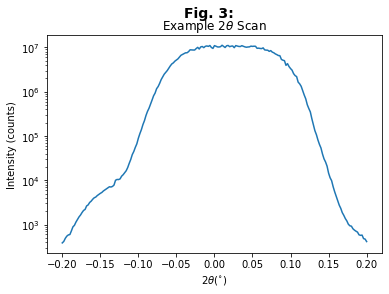

In [7]:
display(tag)
df_2theta = pd.read_table('https://raw.githubusercontent.com/josephmccourt2018/lab_jupyter_notebooks/master/example/461_test/PLD50nmFe2O3_Al2O3/HRXRD_Lab/2th_stb.ras',sep = '\s+',comment='*',names = ["2TH","Intensity", "attenuatation"],header = None)
plt.figure()
plt.suptitle('Fig. 3:', fontsize=14, fontweight='bold')
plt.title('Example $2\\theta$ Scan')
plt.plot(df_2theta[df_2theta.columns[0]],df_2theta[df_2theta.columns[1]]*df_2theta[df_2theta.columns[2]])
plt.yscale('log')
plt.xlabel("$2\\theta$($^{\circ}$)")
plt.ylabel(df_2theta.columns[1]+" (counts)")
plt.show()

### Follow the instructions and put a check mark in each step as you advance. These steps are to align the thin film sample in preparation for measurements.

In [8]:
display(tag)

#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code

alignment_guidance = ['Make sure the sample is centered on the stage (circular plate). If not, ask the XRD facility staff to reposition the sample.',
            'In Manual Control, select $Z$ from the Axis list. Make sure slits are the same as they were for the $2\\theta$ scan. These slit values were determined specifically for your lab experiment. The reduced intensity caused by the monochromator will be somewhat mitigated by larger slits (compared to the XRR experiment). Ask your supervisor for more information.',
            'Move the sample out of the beam (i.e. move the sample 2 mm down in $Z$).',
            'Select the $2\\theta \chi$ axis and perform a $2\\theta \chi$ scan [relative -$2.5$ to $2.5$ deg, step = $0.05$ deg, speed = $5$ deg/min]. Move to the center of the peak. Then, move the sample back into the beam (your previous $Z$ value). Make sure Automatic Attenuator is checked in the Scan Tab.',
            'Now, with the sample moved back into the beam, perform an Absolute $Z$ scan by entering the following values [range = $-3$ to $0$ mm, step $= 0.02$ mm/step, speed$=4$ mm/min] and clicking on Scan to start. This is a coarse $Z$ scan done to locate our sample. <b><i>NOTE:</b> The units for the scan speed will actually be mm/min even though the template shows deg/min.',
            'The scan should show a flat line, followed by a drop to zero once the beam crosses the sample. You can read off the $Z$ postion values by moving the cross hairs in the Display Area. Move the $Z$ position to the halfway point of this "drop" by entering the $Z$ value you read off in the Move box and clicking Move (i.e. when the incoming beam reaches half its intensity).',
            'Select R$_y$ from the Axis List. Check the option Move to Peak.',
            'Perform a R$_y$ scan [relative -$1$ to $1$, step$=0.01$ deg/step, speed$=4$ deg/min]. Again, make sure Automatic Attenuator is checked. The located peak will be labeled with a red X.',
            'Now perform another $Z$ scan [Relative -$0.4$ to $0.4$, step$=0.002$ mm/step, speed$=2$ mm/min]. Make sure the option Relative is selected. Notice, your most recent scan will be colored RED. Again, move to the same "halfway" point',
            'Save $Z$ scan by clicking on the save icon ("floppy disk"). Save in your netID directory in the following format: "z_stb.ras".',
            'Record the Straight Through Beam Intensity (STB) in the $\\textbf{Important Parameters}$ section above. To find the STB, in the top of the screen select the chart tab. Click on Coordinate and place the cursor at the maximum value of your scan. It should be around ($5\\times 10^{7}$ cps)']


# To do list containing all the steps for XRR on SmartLab Gen 2
alignment_studio = ['Make sure the sample is centered on the stage (circular plate). If not, ask the XRD facility staff to reposition the sample.',
            'In Pro Control, select $Z$ from the Axis list. Make sure slits are the same as they were for the $2\\theta$ scan. These slit values were determined specifically for your lab experiment. The reduced intensity caused by the monochromator will be somewhat mitigated by larger slits (compared to the XRR experiment). Ask your supervisor for more information.',
            'Move the sample out of the beam (i.e. move the sample 2 mm down in $Z$).',
            'Select the $2\\theta \chi$ axis and perform a $2\\theta \chi$ scan [relative -$2.5$ to $2.5$ deg, step = $0.05$ deg, speed = $5$ deg/min]. Move to the center of the peak. Then, move the sample back into the beam (your previous $Z$ value). Make sure Automatic Attenuator is checked in the Scan Tab.',
            'Now, with the sample moved back into the beam, perform an Absolute $Z$ scan by entering the following values [range = $-3$ to $0$ mm, step $= 0.02$ mm/step, speed$=4$ mm/min] and clicking on Scan to start. This is a coarse $Z$ scan done to locate our sample.',
            'The scan should show a flat line, followed by a drop to zero once the beam crosses the sample. You can read off the $Z$ postion values by moving the cross hairs in the Display Area. Move the $Z$ position to the halfway point of this "drop" by entering the $Z$ value you read off in the Move box and clicking Move (i.e. when the incoming beam reaches half its intensity).',
            'Select R$_y$ from the Axis List. Check the option Move to Peak.',
            'Perform a R$_y$ scan [relative -$1$ to $1$, step$=0.01$ deg/step, speed$=4$ deg/min]. Again, make sure Automatic Attenuator is checked. The located peak will be labeled with a red X.',
            'Now perform another $Z$ scan [Relative -$0.4$ to $0.4$, step$=0.002$ mm/step, speed$=2$ mm/min]. Make sure the option Relative is selected. Notice, your most recent scan will be colored RED. Again, move to the same "halfway" point',
            'Save the $Z$ scan in your netID directory in the following format: "z_stb.ras".',
            'Record the Straight Through Beam Intensity (STB) in the $\\textbf{Important Parameters}$ section above. To find the STB, in the top of the screen select the chart tab. Click on Coordinate and place the cursor at the maximum value of your scan. It should be around ($5\\times 10^{7}$ cps)']

if (machine_toggle_1.value):
    step_list_alignment = alignment_guidance
    print("Instructions for SmartLab Guidance")
else:
    step_list_alignment = alignment_studio
    print("Instructions for SmartLab Studio II")

checkbox_array_alignment= []
for step in step_list_alignment:
    step_index = str(step_list_alignment.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_alignment.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb2 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
    
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_alignment:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_alignment.index(checkbox)+1))
            pb2.button_style='danger'
    if steps_completed == len(checkbox_array_alignment):
        print("You finished Sample Alignment. Good Job! Now we are ready to perform High Resolution X-ray Diffraction (HRXRD) on our sample.")
        pb2.button_style='success'
        
pb2.on_click(on_button_clicked)
display(pb2)

Instructions for SmartLab Studio II


GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Make sure th…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='In Pro Contr…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Move the sam…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='Now, with th…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>6:'), HTMLMath(value='The scan sho…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>7:'), HTMLMath(value='Select R$_y$…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>8:'), HTMLMath(value='Perform a R$…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>9:'), HTMLMath(value='Now perform …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>10:'), HTMLMath(value='Save the $Z…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>11:'), HTMLMath(value='Record the …

Button(button_style='info', description='Finish!', style=ButtonStyle())

## 2. Aligning to the Substrate for In Plane Measurements

In order to perform $\phi$ scans of off-specular peaks, we first have to make sure that the $c$-axis of the substrate is along the $\phi$ axis.  To perform this alignment, we move $2\theta / \omega$ to the $\text{Al}_2\text{O}_3$ (006) Bragg peak at Cu K$\alpha$1. Do not forget to add in the $2\theta$ correction to the value you get for $2\theta$ from SingleCrystal. Due to the miscut of the surface and how the substrate was attached to the sample plate there will initially be some misalignment between the c-axis and the phi-axis.  Referring to **Fig. 1**, we will use the R$_x$ and R$_y$ axes, which are orthogonal to each other and to the $\phi$ axis to achieve this alignment. Note that at $\phi$ = 0 the R$_y$ axis is aligned with the $\omega$ axis and when $\phi$=90° the R$_x$ axis is aligned with the $\omega$ axis (**Fig. 4**). Then we perform successive $\omega$ scans at different $\phi$ values and adjust R$_x$ and R$_y$ so that in the end the 006 Bragg peak position in an  $\omega$ scan is invarient to a rotation in $\phi$. 

<div align="center">
<FIGURE> 
   <img src="https://github.com/josephmccourt2018/lab_jupyter_notebooks/blob/master/images/in_plane_align.png?raw=true" />
    <FIGCAPTION> <b>Fig. 4:</b> <i> Direction of rotation axes. <strong>Note</strong>: At $\phi$ = 0,180°, R$_y$ is along $\omega$ and at $\phi$ = 90°, 270°, R$_x$ is along $\omega$. The goal is to align the $c$-axis of the substrate along the $\phi$ axis of the diffractometer.

</FIGURE>

</div>

These next alignment steps are crucial for the success of the experiment. Read the instructions carefully and ask your lab supervisor for assistance if you are confused or having difficulty. Fill in the table below as you go through the steps to help keep track of different values. To do this, show the cell's raw code input and enter your values for the appropriate parameters as you progress through the step list.

In [9]:
display(tag)

# Enter your measured values for the parameters below
Ry_phi0 = 0
Ry_phi180 = 0
Ry_avg = 0 # (Ry_phi0 + Ry_phi180)/2
Rx_phi90 = 0
Rx_phi270 = 0
Rx_avg = 0 # (Rx_phi90 + Ry_phi270)/2
omega_phi0 = 0
omega_phi180 = 0
omega_avg = 0 # (omega_phi0 + omega_phi180)/2
Ry_offset = 0 # Ry_avg +/- omega_avg (phi=0/phi=180)








# Tables displaying the calculations as you go through the alignment steps
n0 = Markdown("The default values should be changed based on your own measurements. The values in these tables can be edited by changing the variables in the code cell above. Make sure to run the call after updating.")

t1 = Markdown("|$\phi$($\circ$) | R$_y$($\circ$) | R$_x$($\circ$) | \
         \n|------|------|-----|\
         \n|   {} | {}|{}|\
         \n|   {} | {}|{}|\
         \n|   {} | {}|{}|\
         \n|   {} | {}|{}|".format(0,Ry_phi0,0,180,Ry_phi180,0,90,Ry_avg,Rx_phi90,270,Ry_avg,Rx_phi270))

n1 = Markdown("The value of R$_y$ is now more finely tuned based on the average of two $\omega$ scans at $\phi=0\\text{, } 180$.")

t2 = Markdown("|$\phi$($\circ$) | $\omega$($\circ$) | R$_y$($\circ$) | R$_x$($\circ$) | \
         \n|------|------|------|-----|\
         \n|   {} | {}|{}|{}|\
         \n|   {} | {}|{}|{}|".format(0,omega_phi0,Ry_avg,Rx_avg,180,omega_phi180,Ry_avg,Rx_avg))

display(n0,t1,t2)

The default values should be changed based on your own measurements. The values in these tables can be edited by changing the variables in the code cell above. Make sure to run the call after updating.

|$\phi$($\circ$) | R$_y$($\circ$) | R$_x$($\circ$) |          
|------|------|-----|         
|   0 | 0|0|         
|   180 | 0|0|         
|   90 | 0|0|         
|   270 | 0|0|

|$\phi$($\circ$) | $\omega$($\circ$) | R$_y$($\circ$) | R$_x$($\circ$) |          
|------|------|------|-----|         
|   0 | 0|0|0|         
|   180 | 0|0|0|

### Follow the instructions and put a check mark in each step as you advance. These steps are to measure the (006) diffraction peak of the substrate (Al$_2$O$_3$) and align in R$_x$ and R$_y$ such that the $\phi$ axis is along the direction of the $c$-axis of the substrate.

In [10]:
display(tag)
#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code

step_list_sub_guidance = ['Select the $2\\theta$/$\omega$ axis  in Manual Control. Move to the theoretical $\\text{Al}_2\\text{O}_3$ (006) peak (adding to it your $2\\theta_{0}$ offset).',
            'We are now going to perform a series of R$_y$ and R$_x$ scans. You may wish to enter your values into the cell above to keep track of your measurements.',
            'Select the R$_y$ axis in Manual Control. Make sure Automatic Attenuator is on. Also, make sure to Move to Peak is selected for FWHM.',
            'Make sure $\phi = 0^{\circ}$. Perform an R$_y$ scan [Relative -.3 to .3, step=0.003 deg/step, speed=2 deg/min]. Note down the location of the peak (this is the variable named <i>Ry_phi0</i> in code cell above).',
            'Now move $\phi$ to $180^{\circ}$. Perform the same R$_y$ scan. Note down the location of the peak (<i>Ry_phi180</i>).',
            'Calculate the average of the two R$_y$ peak positions. Move R$_y$ to the average value (<i>Ry_avg</i>).',
            'Now we want to repeat <b>Steps</b> 3-6 for R$_x$ at $\phi=90$ and $\phi=270$ (see <b>Fig. 4</b>). For scan paramters, use [relative -0.5 to 0.5, 0.01, 4 deg/min]. Do this now, keeping track of your peak positions.',
            'You should now have R$_y$ and R$_x$ set to their respected average values (avg over $\phi$). Verify this.',
            'To check the alignment, we will perform some $\omega$ scans at different $\phi$. Ideally, the $\omega$ peak position should be independent of $\phi$. In reality, we want $\Delta\omega(\phi)<0.002^{\circ}$.',
            'Move $\phi$ to $0^{\circ}$. Select the $\omega$ axis in Manual Control. Perform an $\omega$ scan [Relative -0.05 to 0.05, step=0.0008, speed=0.8 deg/min].',
            'Repeat the $\omega$ scan for $\phi=180^{\circ}$. The peak should shift only slightly. Calculate the average peak position from these two scans.',
            'To optimize our alignment, we now want to update our R$_y$ based on these $\omega$ scans (recall, R$_y$ is in the same direction as $\omega$ at these $\phi$ values). Notice how the peak shifts slightly after rotating in $\phi$. Add or subtract the relative difference ($\\frac{\Delta\omega}{2}$) of the $\omega$ peaks to R$_y$ based on <b>Fig. 4</b>.',
            'Repeat the $\omega$ scan at either $\phi=0$ or $\phi=180$ to check that you offset R$_y$ in the right direction.',
            'You may need to perform <b>Steps</b> 10-13 for R$_x$ (with $\phi=90,270$) to further improve alignment, but if the $\omega$ peak only changes a couple 1/1000 of a degree over rotations in $\phi$, then you are all set!']

# To do list containing all the steps for HRXRD
step_list_sub_studio = ['Select the $2\\theta$/$\omega$ axis in Pro Control. Move to the theoretical $\\text{Al}_2\\text{O}_3$ (006) peak (adding to it your $2\\theta_{0}$ offset).',
            'We are now going to perform a series of R$_y$ and R$_x$ scans. You may wish to enter your values into the cell above to keep track of your measurements.',
            'Select the R$_y$ axis in Pro Control. Make sure Automatic Attenuator is on. Also, make sure to Move to Peak is selected for FWHM.',
            'Make sure $\phi = 0^{\circ}$. Perform an R$_y$ scan [Relative -.3 to .3, step=0.003 deg/step, speed=2 deg/min]. Note down the location of the peak (this is the variable named <i>Ry_phi0</i> in code cell above).',
            'Now move $\phi$ to $180^{\circ}$. Perform the same R$_y$ scan. Note down the location of the peak (<i>Ry_phi180</i>).',
            'Calculate the average of the two R$_y$ peak positions. Move R$_y$ to the average value (<i>Ry_avg</i>).',
            'Now we want to repeat <b>Steps</b> 3-6 for R$_x$ at $\phi=90$ and $\phi=270$ (see <b>Fig. 4</b>). For scan paramters, use [relative -0.5 to 0.5, 0.01, 4 deg/min]. Do this now, keeping track of your peak positions.',
            'You should now have R$_y$ and R$_x$ set to their respected average values (avg over $\phi$). Verify this.',
            'To check the alignment, we will perform some $\omega$ scans at different $\phi$. Ideally, the $\omega$ peak position should be independent of $\phi$. In reality, we want $\Delta\omega(\phi)<0.002^{\circ}$.',
            'Move $\phi$ to $0^{\circ}$. Select the $\omega$ axis in Pro Control. Perform an $\omega$ scan [Relative -0.05 to 0.05, step=0.0008, speed=0.8 deg/min].',
            'Repeat the $\omega$ scan for $\phi=180^{\circ}$. The peak should shift only slightly. Calculate the average peak position from these two scans.',
            'To optimize our alignment, we now want to update our R$_y$ based on these $\omega$ scans (recall, R$_y$ is in the same direction as $\omega$ at these $\phi$ values). Notice how the peak shifts slightly after rotating in $\phi$. Add or subtract the relative difference ($\\frac{\Delta\omega}{2}$) of the $\omega$ peaks to R$_y$ based on <b>Fig. 4</b>.',
            'Repeat the $\omega$ scan at either $\phi=0$ or $\phi=180$ to check that you offset R$_y$ in the right direction.',
            'You may need to perform <b>Steps</b> 10-13 for R$_x$ (with $\phi=90,270$) to further improve alignment, but if the $\omega$ peak only changes a couple 1/1000 of a degree over rotations in $\phi$, then you are all set!']

if (machine_toggle_1.value):
    step_list_sub = step_list_sub_guidance
    print("Instructions for SmartLab Guidance")
else:
    step_list_sub = step_list_sub_studio
    print("Instructions for SmartLab Studio II")

checkbox_array_sub = []
for step in step_list_sub:
    step_index = str(step_list_sub.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_sub.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80%',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
#    if step_list_sub.index(step)+1 == 4:
#        display(t1)
    
#create finish button that verifies all steps have been completed
pb4 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_sub:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_sub.index(checkbox)+1))
            pb4.button_style='danger'
    if steps_completed == len(checkbox_array_sub):
        print("This is a very precise alignment. Nice job on completing the steps!")
        pb4.button_style='success'
        
pb4.on_click(on_button_clicked)
display(pb4)

Instructions for SmartLab Studio II


GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='We are now g…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Select the R…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='Make sure $\…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='Now move $\\…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>6:'), HTMLMath(value='Calculate th…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>7:'), HTMLMath(value='Now we want …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>8:'), HTMLMath(value='You should n…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>9:'), HTMLMath(value='To check the…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>10:'), HTMLMath(value='Move $\\phi…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>11:'), HTMLMath(value='Repeat the …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>12:'), HTMLMath(value='To optimize…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>13:'), HTMLMath(value='Repeat the …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>14:'), HTMLMath(value='You may nee…

Button(button_style='info', description='Finish!', style=ButtonStyle())

### Before Performing HRXRD Off-Specular...
Before we look at off-specular reflections, we will perform a $2\theta/\omega$ scan through the **specular** 1st order film peak and substrate peaks (as you did in Lab 2). Move to the SingleCrystal predicted $2\theta/\omega$ of the film peak and do a $2\theta/\omega$ relative scan [-3 to +3° with .02° step and 3° per minute]. 

Save the $2\theta/\omega$ scan file and tabulate the $2\theta$ values for the substrate 006 peak and the Pt 111 or Fe2O3 (006) peaks in the table below (again, show the code and then enter your values for the appropriate parameters). These values will be important for comparing out-of-plane strain to in-plane strain.


In [11]:
display(tag)

# SPECULAR 2-theta values for film and substrate
film = "Film"
substrate = "Substrate"
hkl_film = "001"
hkl_sub = "001"
two_th_film_theory = 0 
two_th_sub_theory = 0
two_th_film_exp = 0
two_th_sub_exp = 0






t1 = Markdown("| Material | (hkl) | 2$\\theta$($\circ$) (Theoretical) |2$\\theta$($\circ$) (Measured)  |  \
         \n|------|------|------|------|\
         \n|   {} | {}|{}|{} |\
         \n|   {} | {}|{}|{} |".format(film,hkl_film,two_th_film_theory,two_th_film_exp,substrate,hkl_sub,two_th_sub_theory,two_th_sub_exp))

display(t1)

| Material | (hkl) | 2$\theta$($\circ$) (Theoretical) |2$\theta$($\circ$) (Measured)  |           
|------|------|------|------|         
|   Film | 001|0|0 |         
|   Substrate | 001|0|0 |


## 3. Performing HRXRD (Off-Specular)

Now we move to Bragg peak for the off-specular reflection (for example, $2\theta/\omega$ = 35.135 for the (104) reflection of $\text{Al}_2\text{O}_3$, see **Fig. 5** below). We also need to move $\chi$ to the appropriate elevation value for this reflection. The (hkl) incidices, the $2\theta/\omega$ value, and the $\chi$ value of the appropriate off-specular reflection plane are found using CrystalMaker and SingleCrystal.



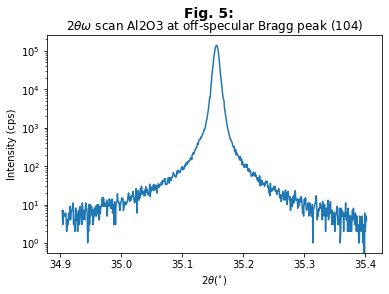

In [12]:
#2tw substrate example (Al2O3 -114 peak)
display(tag)
df_2tw_al2o3 = pd.read_table('https://raw.githubusercontent.com/josephmccourt2018/lab_jupyter_notebooks/master/example/461_test/PLD10nmFe2O3_Al2O3/Off_Specular/2TWFINE_Al2O3_104_0002_Scan2020Oct15-122201.ras',sep = '\s+',comment='*',names = ["2TH","Intensity","att"],header = 1)
plt.figure()
plt.suptitle('Fig. 5:', fontsize=14, fontweight='bold')
plt.title('$2\\theta\omega$ scan Al2O3 at off-specular Bragg peak ($104$)')
plt.plot(df_2tw_al2o3[df_2tw_al2o3.columns[0]],df_2tw_al2o3[df_2tw_al2o3.columns[1]]*df_2tw_al2o3[df_2tw_al2o3.columns[2]])
plt.yscale('log')
plt.xlabel("2$\\theta$($^{\circ}$)")
plt.ylabel(df_2tw_al2o3.columns[1]+" (cps)")
plt.show()

### Examples of Off-Specular Reflections

Here are the off-specular reflections for the sapphire substrate and iron oxide/platinum films we will examine. These values were found using CrystalMaker and SingleCrystal softwares.


| Material       | (hkl)        |  2$\theta$($\circ$)| $\chi$($\circ$)|
| :------------- | :----------: | -----------: | -----------: | 
|  $\text{Al}_2\text{O}_3$ | ($104$)   | $35.15$   | $38.2$      |
| $\text{Fe}_2\text{O}_3$  | ($104$) | $33.15$ | $38.2$     |
| $\text{Pt}$  | ($\bar{1}1\bar{1}$) | $39.84$    | $70.5$    |


### Follow the instructions and put a check mark in each step as you advance. These steps are to measure off-specular reflection of your substrate and film.

In [13]:
display(tag)
#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code

step_list_off_spec_guidance = ['First we will look at the substrate. In Manual Control, select the $\chi$ axis. Move to the appropriate $\chi$ position for the substrate based on the elevation value you found in SingleCrystal $(\chi = 90^{\circ} - \\text{elevation})$.',
            'Select the $2\\theta$/$\omega$ axis  in Pro Control. Move to the expected off-specular peak position for the substrate.',
            'We are now going to perform an in-plane scan. Select the $\phi$ axis in Pro Control. Make sure Automatic Attenuator is on. Do a coarse $\phi$ scan [Absolute 0 to 120 deg, step=0.03 deg, speed=36 deg/min ]. You should see peaks appearing as we rotate all the way around in $\phi$ based on the symmetry of your reflection (e.g. the $(\\bar{1}14)$ reflection of $\\text{Al}_2\\text{O}_3$ has 3-fold symmetry and we see 3 peaks)',
            'Move to the highest intensity peak and perform a relative $\phi$ scan [+/- 1 deg, step=0.004, speed=2 deg/min]. Move to the center.',
            'Now we want to optimize $2\\theta/\omega$ and $\chi$ values. Perform a relative $2\\theta/\omega$ scan [+/- 0.25, step=0.008, speed=0.5)]. Move to center.',
            'Perform a relative $\chi$ scan [+/- 1, step=0.01, speed=3)]. Move to center.',
            'The peak position values for the $2\\theta/\omega$ and $\chi$ correspond to the measured peak positions that should be inputted in the table shown in the <b>What do we expect?</b> section.',
            'Repeat your $\phi$ scan of an individual peak. Save this scan: "PHI_FINE_Al2O3.ras"',
            'Repeat your $\phi$ scan over the full $360^{\circ}$. Save the scan: "PHI_FULL_Al2O3.ras".',
            'Repeat <b>Steps</b> 1-9 for your film. Remember, you have to adjust $2\\theta/\omega$ and $\chi$ based on what you found in SingleCrystal for your film.']

# To do list containing all the steps for HRXRD
step_list_off_spec_studio = ['First we will look at the substrate. In Pro Control, select the $\chi$ axis. Move to the appropriate $\chi$ position for the substrate based on the elevation value you found in SingleCrystal $(\chi = 90^{\circ} - \\text{elevation})$.',
            'Select the $2\\theta$/$\omega$ axis  in Pro Control. Move to the expected off-specular peak position for the substrate.',
            'We are now going to perform an in-plane scan. Select the $\phi$ axis in Pro Control. Make sure Automatic Attenuator is on. Do a coarse $\phi$ scan [Absolute 0 to 120 deg, step=0.03 deg, speed=36 deg/min ]. You should see peaks appearing as we rotate all the way around in $\phi$ based on the symmetry of your reflection (e.g. the $(\\bar{1}14)$ reflection of $\\text{Al}_2\\text{O}_3$ has 3-fold symmetry and we see 3 peaks)',
            'Move to the highest intensity peak and perform a relative $\phi$ scan [+/- 1 deg, step=0.004, speed=2 deg/min]. Move to the center.',
            'Now we want to optimize $2\\theta/\omega$ and $\chi$ values. Perform a relative $2\\theta/\omega$ scan [+/- 0.25, step=0.008, speed=0.5)]. Move to center.',
            'Perform a relative $\chi$ scan [+/- 1, step=0.01, speed=3)]. Move to center.',
            'The peak position values for the $2\\theta/\omega$ and $\chi$ correspond to the measured peak positions that should be inputted in the table shown in the <b>What do we expect?</b> section.',
            'Repeat your $\phi$ scan of an individual peak. Save this scan: "PHI_FINE_Al2O3.ras"',
            'Repeat your $\phi$ scan over the full $360^{\circ}$. Save the scan: "PHI_FULL_Al2O3.ras".',
            'Repeat <b>Steps</b> 1-9 for your film. Remember, you have to adjust $2\\theta/\omega$ and $\chi$ based on what you found in SingleCrystal for your film.']

if (machine_toggle_1.value):
    step_list_off_spec = step_list_off_spec_guidance
    print("Instructions for SmartLab Guidance")
else:
    step_list_off_spec = step_list_off_spec_studio
    print("Instructions for SmartLab Studio II")

checkbox_array_off_spec = []
for step in step_list_off_spec:
    step_index = str(step_list_off_spec.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_off_spec.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80%',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb5 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_off_spec:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_off_spec.index(checkbox)+1))
            pb5.button_style='danger'
    if steps_completed == len(checkbox_array_off_spec):
        print("Congrats on performing off-specular X-ray diffraction!")
        pb5.button_style='success'
        
pb5.on_click(on_button_clicked)
display(pb5)

Instructions for SmartLab Studio II


GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='First we wil…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='Select the $…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='We are now g…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='Move to the …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>5:'), HTMLMath(value='Now we want …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>6:'), HTMLMath(value='Perform a re…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>7:'), HTMLMath(value='The peak pos…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>8:'), HTMLMath(value='Repeat your …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>9:'), HTMLMath(value='Repeat your …

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>10:'), HTMLMath(value='Repeat <b>S…

Button(button_style='info', description='Finish!', style=ButtonStyle())

Here are example $\phi$ scans for the film and substrate (104) peaks for the 10 nm  $\text{Fe}_2\text{O}_3$ film on the sapphire substrate showing the $3$-fold symmetry of each family of reflections. This not only shows that the film is single crystal, but that it's a and b axes are aligned with the substrates a and b axes. From your optimized $2\theta/\omega$ scans through the specular and off-specular film peaks you should be able to use Braggs' Law to determine the (hkl) d-spacings and then convert these two findings into out-of-plane and in-plane lattice constants. Do not be surprised if your film vaules differ from the CrystalMaker values for the bulk-like unstrained Fe2O3 or Pt crystal. As a check do the same for the sapphire substrate a and c hexagonal lattice constant values. 

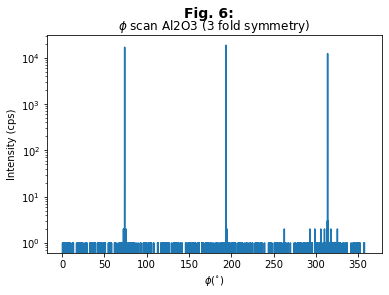

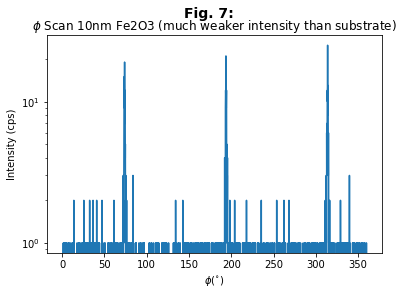

In [14]:
#phi substrate example (Al2O3)
display(tag)
df_phi_al2o3 = pd.read_table('https://raw.githubusercontent.com/josephmccourt2018/lab_jupyter_notebooks/master/example/461_test/PLD10nmFe2O3_Al2O3/Off_Specular/PhiFULL_Al2O3_104_0003_Scan2020Oct15-122843.ras',sep = '\s+',comment='*',names = ["phi","Intensity","att"],header = 1)
plt.figure()
plt.suptitle('Fig. 6:', fontsize=14, fontweight='bold')
plt.title('$\phi$ scan Al2O3 (3 fold symmetry)')
plt.plot(df_phi_al2o3[df_phi_al2o3.columns[0]],df_phi_al2o3[df_phi_al2o3.columns[1]]*df_phi_al2o3[df_phi_al2o3.columns[2]])
plt.yscale('log')
plt.xlabel("$\phi$($^{\circ}$)")
plt.ylabel(df_phi_al2o3.columns[1]+" (cps)")
plt.show()

#phi film example (10nm Fe2O3)
df_phi_full_fe2o3 = pd.read_table('https://raw.githubusercontent.com/josephmccourt2018/lab_jupyter_notebooks/master/example/461_test/PLD10nmFe2O3_Al2O3/Off_Specular/PhiFULL_Fe2O3_104_0007_Scan2020Oct15-125410.ras',sep = '\s+',comment='*',names = ["phi","Intensity","att"],header = 1)
plt.figure()
plt.suptitle('Fig. 7:', fontsize=14, fontweight='bold')
plt.title('$\phi$ Scan 10nm Fe2O3 (much weaker intensity than substrate)')
plt.plot(df_phi_full_fe2o3[df_phi_full_fe2o3.columns[0]],df_phi_full_fe2o3[df_phi_full_fe2o3.columns[1]]*df_phi_full_fe2o3[df_phi_full_fe2o3.columns[2]])
plt.yscale('log')
plt.xlabel("$\phi$($^{\circ}$)")
plt.ylabel(df_phi_full_fe2o3.columns[1]+" (cps)")
plt.show()

# 4. Finishing Measurement

Congratulations on performing an HRXRD off-specular experiment. It is now time to complete some final steps. Always leave the Smartlab in the same state as it was before you began your experiment (e.g. X-ray source turned off, software closed, etc.).

### Follow the instructions and put a check mark in each step as you advance.


In [15]:
display(tag)

#Displaying a checklist for to do list
#https://stackoverflow.com/questions/41469554/python-jupyter-notebook-create-dynamic-checklist-user-input-that-runs-code


# To do list containing all the steps for XRR on SmartLab (Gen 3? or Gen 2? the latest one)
step_list_finish = ['Make sure the following motors are set to zero in the H/W Status Tab: $2\\theta$, $\omega$, $2\\theta\chi$, $\chi$, $\phi$, R$_x$, R$_y$. If not, open the tab for the specific motor in Pro/Manual Control, put zero and click on Move.',
            'Open XG Control.',
            'Turn Off the X-Ray by clicking the Off button. There is no need to set the voltage or current to any value.',
            'In the Data Browser Window, delete all your scans so next user can start with a clean workspace. Make sure you have all the necessary scans saved.']
checkbox_array_finish = []
for step in step_list_finish:
    step_index = str(step_list_finish.index(step)+1)
    checkbox = widgets.Checkbox(description = "<strong> Step </strong>"+step_index+":")
    checkbox_array_finish.append(checkbox)
    #use HTMLMath widget to get text right
    temp_step = widgets.HTMLMath(step)
    #set up a GridBox to display properly
    box = widgets.GridBox([checkbox, temp_step],layout=Layout(width='100%',
            grid_template_columns='20% 80% ',
            grid_template_areas='''
            "checkbox temp_step"
            '''))
    display(box)
    
#create finish button that verifies all steps have been completed
pb5 = widgets.Button(
    description='Finish!',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
)
#defining what the button will do on clicking
def on_button_clicked(b):
    print("------------------------------------------------------------------------------------")
    print("clicked on: Finish!")
    steps_completed=0
    for checkbox in checkbox_array_finish:
        if checkbox.value ==True:
            steps_completed+=1
            continue;
        else:
            print("You did not complete step " + str(checkbox_array_finish.index(checkbox)+1))
            pb5.button_style='danger'
    if steps_completed == len(checkbox_array_finish):
        print("You are all set!")
        print("Please let us know if anything can be improved.") 
        pb5.button_style='success'
        
pb5.on_click(on_button_clicked)
display(pb5)

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>1:'), HTMLMath(value='Make sure th…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>2:'), HTMLMath(value='Open XG Cont…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>3:'), HTMLMath(value='Turn Off the…

GridBox(children=(Checkbox(value=False, description='<strong> Step </strong>4:'), HTMLMath(value='In the Data …

Button(button_style='info', description='Finish!', style=ButtonStyle())